# International Education Analysis
## by Scott Haluck

## Preliminary Wrangling

The Programme for International Student Assessment (PISA) 2012 study gathered data about student performance, student life, and school quality from 65 countries. The data is expansive in both breadth and depth, so it can be analyzed from a variety of perspectives.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# import all data
pisa = pd.read_csv('./pisa2012.csv', encoding='latin-1', low_memory=False)

In [3]:
# identified inconsistent country name formatting
(pisa.NC == 'United States of America ').sum()

10294

In [4]:
# initial investigation into data format
print(pisa.shape)
print(pisa.dtypes.sample(10))
print(pisa.info())
pisa.sample(5)

(485490, 636)
ST79Q07     object
QUESTID     object
ST62Q16     object
PV5MACU    float64
PARED      float64
ST84Q03     object
PV3READ    float64
ST46Q03     object
ST46Q09     object
ST91Q02     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB
None


,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
298889,298890,Lithuania,4400000,LTU0011,Non-OECD,Lithuania,124,2704,8,7.0,...,9.7425,9.7425,9.7425,3.3777,3.3777,9.7425,14,1,0.2002,22NOV13
211875,211876,Croatia,1910000,HRV0003,Non-OECD,Croatia,10,305,9,2.0,...,12.3476,12.3476,3.9857,3.9857,3.9857,3.9857,63,2,0.1781,22NOV13
253618,253619,Italy,3800000,ITA1801,OECD,Italy,498,13029,10,1.0,...,4.0451,1.3967,1.3484,3.9458,1.3926,1.3967,62,1,0.0053,22NOV13
435786,435787,Slovak Republic,7030000,SVK0001,OECD,Slovak Republic,140,2781,9,1.0,...,26.2000,8.7333,8.7333,8.7333,8.7333,26.2000,32,2,0.3197,22NOV13
432579,432580,Serbia,6880000,SRB0010,Non-OECD,Serbia,139,4258,9,4.0,...,6.6905,22.3016,6.6615,20.0714,6.6615,20.0714,71,1,0.2063,22NOV13


### What is the structure of your dataset?

The data contains over 400,000 responses with over 600 variables. The variables are a variety of formats: nominal and ordinal categorical, discrete and continuous quantitative, and plain text. The values are simplified and standard scores calculated around Organisation for Economic Co-operation and Development (OECD) characteristics.

### What is/are the main feature(s) of interest in your dataset?

Student demographics and experience that may contribute to academic achievement:
* Student Demographics
* Family Demographics
* School characteristics

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The summary variables in the data set combine similar measures of student information into a single quantitative or categorical value. This allows for direct comparison between countries and students for analysis. The following variables will be used:
* Student Demographics
    - identification (STIDSTD)
    - country of residence (OECD, NC)
    - gender (ST04Q01)
    - enrollment in preschool (ST05Q01)
    - age at which education began (ST06Q01)
    - immigration status (IMMIG, CULTDIST)
    - language acquisition (EC05Q01, EC06Q01)
    - access to education resources (HEDRES)
    - academic measurements (PV1MATH, PV1READ, PV1SCIE, ANXMAT, MATBEH, MATHEFF, MATINTFC, MATWKETH)
    - social measurements (BELONG, SUBNORM)
* Family Demographics
    - parental levels of education (HISCED, FISCED, MISCED)
    - parental employment (HISEI, OCOD2, OCOD1, BFMJ2, BMMJ1)
    - wealth (CULTPOS, HOMEPOS, WEALTH)
    - status (ESCS)
    - structure (FAMSTRUC)
* School characteristics
    - academic routines (LMINS, MMINS, SMINS)
    - teacher behaviors (CLSMAN, MTSUP, STUDREL, TCHBEHFA, TCHBEHSO, TCHBEHTD, TEACHSUP)


In [5]:
# identify columns of interest and appropriate column names
cols = {'STIDSTD':'student_id',
        'ST04Q01':'gender',
        'OECD':'oecd',
        'NC':'country',
        'ST05Q01':'preschool',
        'ST06Q01':'age_edu_start',
        'IMMIG':'immigration',
        'CULTDIST':'culture_dist',
        'EC06Q01':'age_lang_start',
        'HISCED':'parent_edu',
        'FISCED':'father_edu',
        'MISCED':'mother_edu',
        'HISEI':'parent_occ', 
        'BFMJ2':'father_occ_status',
        'BMMJ1':'mother_occ_status',
        'ESCS':'status_index',
        'FAMSTRUC':'fam_struct',
        'HEDRES':'home_edu_res',
        'PV1MATH':'math_score',
        'PV1READ':'read_score',
        'PV1SCIE':'science_score', 
        'ANXMAT':'math_anxiety',
        'MATBEH':'math_behaviors',
        'MATHEFF':'math_efficacy',
        'MATWKETH':'math_work_ethic',
        'SUBNORM':'math_norm',
        'BELONG':'belong',
        'LMINS':'lang_min',
        'MMINS':'math_min',
        'SMINS':'science_min',
        'MTSUP':'teacher_math_sup',
        'TCHBEHFA':'teacher_form'}

# gather only the columns of interest
pisa_data = pisa.loc[:,cols]
# rename columns with more description
pisa_data.rename(columns=cols, inplace=True)

In [6]:
# test that renaming was successful
pisa_data.sample(5)

,student_id,gender,oecd,country,preschool,age_edu_start,immigration,culture_dist,age_lang_start,parent_edu,...,math_behaviors,math_efficacy,math_work_ethic,math_norm,belong,lang_min,math_min,science_min,teacher_math_sup,teacher_form
374816,1930,Male,Non-OECD,Peru,"Yes, for more than one year",5.0,Native,NaN,NaN,"ISCED 3A, ISCED 4",...,NaN,NaN,NaN,NaN,0.82,315.0,270.0,225.0,0.6709,1.0416
469173,3784,Female,OECD,Turkey,No,6.0,Native,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.08,NaN,NaN,NaN,1.1169,0.5054
315531,5164,Female,Non-OECD,Macao-China,"Yes, for one year or less",5.0,Second-Generation,NaN,NaN,"ISCED 3B, C",...,0.8110,-0.33,0.1099,-0.7176,0.08,NaN,NaN,NaN,-0.2395,-0.9632
57400,2135,Female,Non-OECD,Brazil,"Yes, for more than one year",NaN,Native,NaN,NaN,"ISCED 3A, ISCED 4",...,-0.4567,-1.36,-0.5057,0.6602,NaN,160.0,160.0,80.0,NaN,NaN
108508,1266,Female,OECD,Chile,"Yes, for one year or less",6.0,Native,NaN,NaN,"ISCED 3A, ISCED 4",...,1.0998,-0.63,1.4298,-0.3852,-1.18,NaN,NaN,NaN,-0.2395,-0.5945


In [7]:
# fix inconsistent formatting in country name
pisa_data.country = pisa_data.country.apply(lambda x: x.strip())

In [8]:
# test that formatting was successful
(pisa_data.country == 'United States of America ').sum()

0

In [9]:
# store data of interest for faster loading in the future
pisa_data.to_csv('pisa_summ.csv',index=False)

In [10]:
# load the data of interest
pisa_data = pd.read_csv('pisa_summ.csv', low_memory=False)
pisa_data.head()

,student_id,gender,oecd,country,preschool,age_edu_start,immigration,culture_dist,age_lang_start,parent_edu,...,math_behaviors,math_efficacy,math_work_ethic,math_norm,belong,lang_min,math_min,science_min,teacher_math_sup,teacher_form
0,1,Female,Non-OECD,Albania,No,6.0,Native,NaN,NaN,"ISCED 3A, ISCED 4",...,0.6426,-0.77,0.2882,-0.0455,-1.18,NaN,NaN,NaN,-0.9508,1.3625
1,2,Female,Non-OECD,Albania,"Yes, for more than one year",7.0,Native,NaN,NaN,"ISCED 5A, 6",...,1.4702,0.34,0.6490,0.6602,NaN,315.0,270.0,90.0,NaN,NaN
2,3,Female,Non-OECD,Albania,"Yes, for more than one year",6.0,Native,NaN,NaN,"ISCED 5A, 6",...,0.9618,0.34,2.0389,2.2350,NaN,300.0,NaN,NaN,NaN,NaN
3,4,Female,Non-OECD,Albania,"Yes, for more than one year",6.0,Native,NaN,NaN,"ISCED 5A, 6",...,NaN,NaN,NaN,NaN,NaN,135.0,135.0,90.0,1.6748,0.7644
4,5,Female,Non-OECD,Albania,"Yes, for more than one year",6.0,Native,NaN,NaN,"ISCED 3A, ISCED 4",...,1.8169,0.41,1.6881,2.8039,2.63,NaN,NaN,NaN,0.6709,0.7644


In [11]:
# examine data types for variables
pisa_data.dtypes

student_id             int64
gender                object
oecd                  object
country               object
preschool             object
age_edu_start        float64
immigration           object
culture_dist         float64
age_lang_start        object
parent_edu            object
father_edu            object
mother_edu            object
parent_occ           float64
father_occ_status    float64
mother_occ_status    float64
status_index         float64
fam_struct           float64
home_edu_res         float64
math_score           float64
read_score           float64
science_score        float64
math_anxiety         float64
math_behaviors       float64
math_efficacy        float64
math_work_ethic      float64
math_norm            float64
belong               float64
lang_min             float64
math_min             float64
science_min          float64
teacher_math_sup     float64
teacher_form         float64
dtype: object

In [12]:
# examine the format of the object type in age_lang_start
pisa_data.age_lang_start.unique()

array([nan, '0 to 3 years', '4 to 6 years', '10 to 12 years',
       '7 to 9 years', '13 years or older'], dtype=object)

In [13]:
# investigate summary statistcs for numerical variables
pisa_data.describe()

,student_id,age_edu_start,culture_dist,parent_occ,father_occ_status,mother_occ_status,status_index,fam_struct,home_edu_res,math_score,...,math_behaviors,math_efficacy,math_work_ethic,math_norm,belong,lang_min,math_min,science_min,teacher_math_sup,teacher_form
count,485490.000000,457994.000000,13380.000000,450621.000000,416150.000000,364814.000000,473648.000000,429058.000000,477772.000000,485490.000000,...,313847.000000,315948.000000,314501.000000,316323.000000,313399.000000,282866.000000,283303.000000,270914.000000,313599.000000,314678.000000
mean,6134.066201,6.148963,-0.075938,48.923298,42.423367,44.408617,-0.265546,1.889355,-0.195442,469.621653,...,0.241209,-0.046626,0.135775,0.166138,-0.022259,219.276636,226.007056,211.122460,0.177720,0.137930
std,6733.144944,0.970693,1.008322,22.120953,21.622126,22.018510,1.131791,0.385621,1.074053,103.265391,...,1.054971,0.973588,1.009700,1.088985,0.983503,97.997730,97.448421,131.368322,1.011025,1.027669
min,1.000000,4.000000,-2.721000,11.010000,11.010000,11.010000,-5.950000,1.000000,-3.930000,19.792800,...,-2.140200,-3.750000,-3.450300,-4.245600,-3.690000,0.000000,0.000000,0.000000,-2.864500,-2.391900
25%,1811.000000,6.000000,-0.790100,28.520000,25.390000,25.040000,-1.000000,2.000000,-0.690000,395.318600,...,-0.456700,-0.630000,-0.401700,-0.385200,-0.740000,165.000000,180.000000,120.000000,-0.657700,-0.594500
50%,3740.000000,6.000000,-0.051100,48.820000,34.250000,43.330000,-0.190000,2.000000,0.040000,466.201900,...,0.217100,-0.180000,0.109900,-0.045500,-0.150000,200.000000,220.000000,180.000000,0.248600,0.250900
75%,7456.000000,7.000000,0.353500,70.340000,60.920000,65.010000,0.610000,2.000000,1.120000,541.057800,...,0.811000,0.540000,0.649000,0.660200,0.560000,250.000000,250.000000,270.000000,1.116900,0.764400
max,33806.000000,16.000000,1.535500,88.960000,88.960000,88.960000,3.690000,3.000000,1.120000,962.229300,...,4.424900,2.270000,2.716700,3.858700,2.630000,2400.000000,3000.000000,2975.000000,1.843300,2.629500


## Univariate Exploration

In this section, investigation focuses on distributions of individual variables. Distributions will be observed and noted for possible directions of further analysis.

### General Data
Explore general data of student gender, country, and country OECD status. What are the most common demographics in the data set? How can we use these characteristics for later analysis?

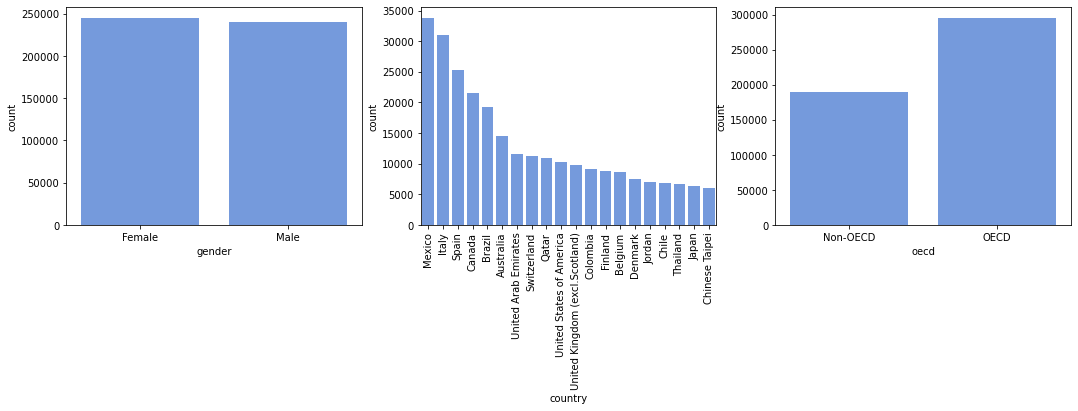

In [14]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sb.countplot(data = pisa_data, x = 'gender', color = 'cornflowerblue');
plt.subplot(132)
sb.countplot(data = pisa_data, x = 'country', order=pisa_data.country.value_counts().iloc[:20].index, color = 'cornflowerblue');
plt.xticks(rotation = 90)
plt.subplot(133)
sb.countplot(data = pisa_data, x = 'oecd', color = 'cornflowerblue');

Data is evenly split between genders. The amount of responses from each country has a wide range, which a heavy representation from North America and Europe. The skew toward North America and Europe may also be due to the higher participation of countries that participate in the OECD. Investigation: Does gender play a role in academic performance and attitudes? Does OECD status provide for better academic performance or better socio-economic status for the students?

### Test Scores
Examine the distributions of the math, reading, and science evaluations of student performance. What are the trends? Are there any noticeable differences in the distributions?

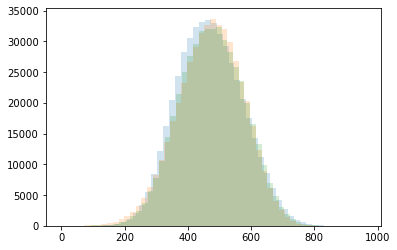

In [15]:
plt.hist(pisa_data.math_score,bins=50, alpha=0.2)
plt.hist(pisa_data.read_score,bins=50, alpha=0.2)
plt.hist(pisa_data.science_score,bins=50, alpha=0.2);

All three evaluations are Normally distributed with centers around 470. Investigation: What contributes to the success or struggle of the groups of students on either end of the spectrum?

### Instructional Minutes
Examine the distribution of instructional minutes of math, language, and science. What subjects receive the most minutes? What subjects are prioritized?

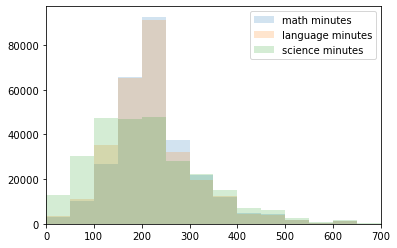

In [16]:
bins = np.arange(0,710,50)
plt.hist(pisa_data.math_min,bins=bins, alpha=0.2)
plt.hist(pisa_data.lang_min,bins=bins, alpha=0.2)
plt.hist(pisa_data.science_min,bins=bins, alpha=0.2)
plt.xlim(0,700)
plt.legend(labels = ['math minutes','language minutes','science minutes']);

Instructional time seems to be consistently spread in math and language,  150-250 minutes per week. Instructional time for science has more variability from student to student. Investigation: how much do instructional minutes effect student performance? attitudes?

### Immigration
Examine the distribution of the different generations of immigrants in the study. Where is a majority of the data? Do the smaller groups still have enough data for reasonable data analysis?

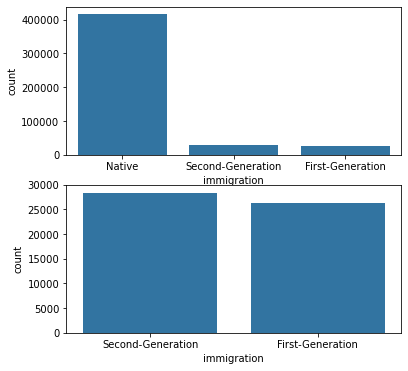

In [17]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(6,6))
plt.subplot(211)
sb.countplot(data = pisa_data, x = 'immigration', color = base_color);
plt.subplot(212)
sb.countplot(data = pisa_data[pisa_data.immigration.isin(['Second-Generation','First-Generation'])], x = 'immigration', color = base_color)
plt.ylim(0,30000);

Most of the students in the data set are native to their country, but there are still considerable numbers of second- and first-generation immigrants to analyze. Investigation: What is the effect of immigration on student behavior and performance? Is it dependent upon the cultural distance of the immigration?

### Parental Education and Employment
Investigate the levels of education and employment for parents. What are the most common levels of educational achievement and occupation? Are they at the expected levels of high school complete and university completion? Is there a gender bias between father and mother? What are the expectations for level of employment?

In [18]:
# organize the levels of parent education in ordered data
levels = ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3B, C', 'ISCED 3A, ISCED 4', 'ISCED 5B', 'ISCED 5A, 6']
edu_levels = pd.api.types.CategoricalDtype(ordered=True, categories = levels)
pisa_data['parent_edu'] = pisa_data['parent_edu'].astype(edu_levels)
pisa_data['father_edu'] = pisa_data['father_edu'].astype(edu_levels)
pisa_data['mother_edu'] = pisa_data['mother_edu'].astype(edu_levels)

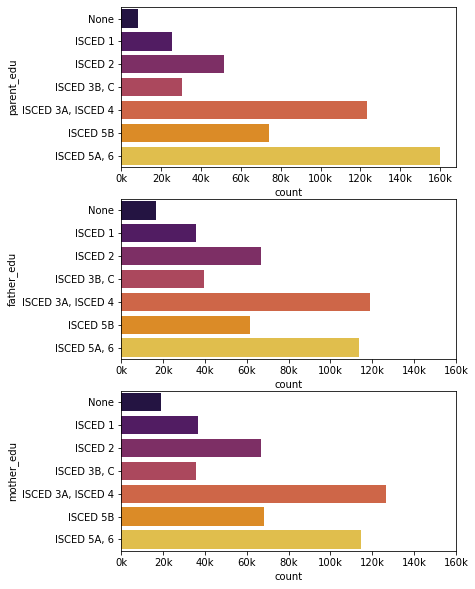

In [19]:
plt.figure(figsize=(6,10))
xticks = np.arange(0,170000,20000)
xlabels = ['0k','20k','40k','60k','80k','100k','120k','140k','160k']
plt.subplot(311)
sb.countplot(data = pisa_data, y = 'parent_edu', palette = 'inferno')
plt.xticks(xticks,xlabels)
plt.subplot(312)
sb.countplot(data = pisa_data, y = 'father_edu', palette = 'inferno')
plt.xticks(xticks,xlabels)
plt.subplot(313)
sb.countplot(data = pisa_data, y = 'mother_edu', palette = 'inferno')
plt.xticks(xticks,xlabels);

Distribution between parental education is fairly consistent between father and mother. Spikes occur at the traditional levels of lower secondary (ISCED 2), upper secondary (ISCED 3A or 4), and university or graduate studies (ISCED 5A or 6). Approximately half of the students in the study have a parent with some college education. Investigation: does further parental education have an effect on student academic performance? attitudes?

C:\Users\sjhal\Anaconda3\envs\dap\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sjhal\Anaconda3\envs\dap\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


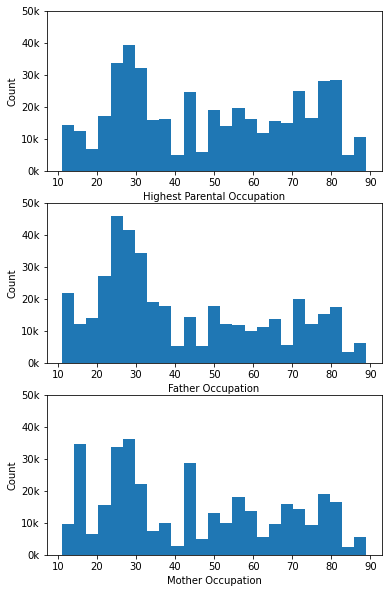

In [20]:
yticks = np.arange(0,51000,10000)
ylabels = ['0k','10k','20k','30k','40k','50k']
plt.figure(figsize=(6,10))
plt.subplot(311)
plt.hist(pisa_data.parent_occ, bins = 25)
plt.yticks(yticks,ylabels)
plt.ylabel('Count')
plt.xlabel('Highest Parental Occupation')
plt.subplot(312)
plt.hist(pisa_data.father_occ_status, bins = 25)
plt.yticks(yticks,ylabels)
plt.ylabel('Count')
plt.xlabel('Father Occupation')
plt.subplot(313)
plt.hist(pisa_data.mother_occ_status, bins = 25)
plt.yticks(yticks,ylabels)
plt.ylabel('Count')
plt.xlabel('Mother Occupation');

In [21]:
pisa_data[['parent_occ','father_occ_status','mother_occ_status']].describe()

,parent_occ,father_occ_status,mother_occ_status
count,450621.000000,416150.000000,364814.000000
mean,48.923298,42.423367,44.408617
std,22.120953,21.622126,22.018510
min,11.010000,11.010000,11.010000
25%,28.520000,25.390000,25.040000
50%,48.820000,34.250000,43.330000
75%,70.340000,60.920000,65.010000
max,88.960000,88.960000,88.960000


Distribution of occupational level for parents is fairly spread out with a mean of approximately 49 and a standard deviation of 22 (with a minumum of 11 and maximum of 89). When parental occupation is analyzed by gender, the lower quartiles are fairly similar to one another, then the distribution of mother's occupation takes a small lead over father's occupation. Investigation: Which parent's employment has a stronger influence on student academic performance?

### Educational Beginnings
Investigate how the students' education began. Explore age of enrollment in primary school and age at which they began to study their current language. Where is the majority of the data? When does formal schooling begin in different countries? When are students introduced to their current academic language?

In [22]:
# explore the possible values for preschool value
pisa_data['preschool'].unique()

array(['No  ', 'Yes, for more than one year',
       'Yes, for one year or less ', nan], dtype=object)

In [23]:
# create a categorical with ordinal values for the student experience with preschool
levels = ['No  ', 'Yes, for one year or less ', 'Yes, for more than one year']
preschool_levels = pd.api.types.CategoricalDtype(ordered=True, categories = levels)
pisa_data['preschool'] = pisa_data['preschool'].astype(preschool_levels)

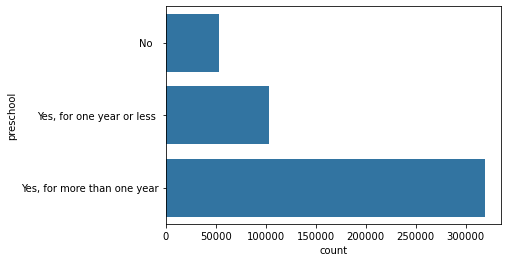

In [24]:
sb.countplot(data = pisa_data, y = 'preschool', color = base_color);

A majority of the students participated in a preschool for more than one year.

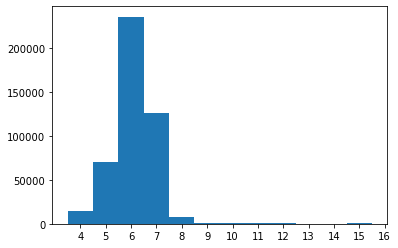

In [25]:
bins = np.arange(4, 17, 1)
plt.hist(pisa_data['age_edu_start'], bins = bins)
plt.xticks(bins+0.5, bins);

Most children began their formal education between the ages of 4 and 8. Investigation: does earlier enrollment provide benefits a decade later (at the time of the survey)?

In [26]:
# create a categorical variable with ordinal values according to the context of beginning language
levels = ['0 to 3 years', '4 to 6 years','7 to 9 years', '10 to 12 years', '13 years or older']
lang_age = pd.api.types.CategoricalDtype(ordered=True, categories = levels)
pisa_data['age_lang_start'] = pisa_data['age_lang_start'].astype(lang_age)

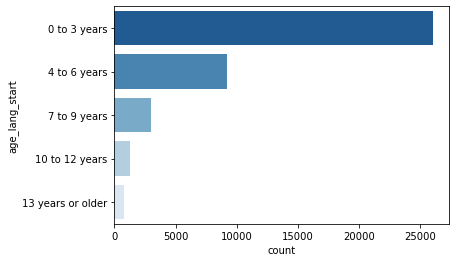

In [27]:
sb.countplot(data = pisa_data, y = 'age_lang_start', palette = 'Blues_r');

Data does not exist for most of the students in the study, but for those with data, most are relatively native speakers of their language or began learning their language in the years of preschool or primary school. Investigation: Do students with an early language edge carry that edge to the edge of this assessment?

### Family Structure
Distribution of family structure and social status. How many parents are present in the home? How is social status distributed globally?

In [28]:
pisa_data.fam_struct.value_counts()

2.0    360003
1.0     58264
3.0     10791
Name: fam_struct, dtype: int64

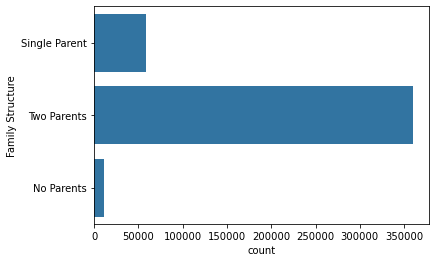

In [29]:
g = sb.countplot(data = pisa_data, y = 'fam_struct', color = base_color)
g.set_yticklabels(['Single Parent','Two Parents','No Parents'])
plt.ylabel('Family Structure');

A strong majority of the students have a two-parent household, but there are still considerable amounts of students in single-parent household and other family arrangements. Investigations will explore family structure influence on socio-economic status and academic performance.

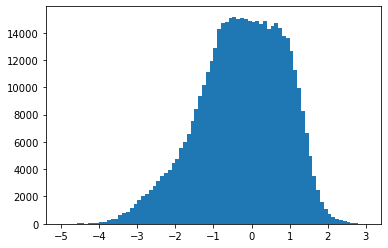

In [30]:
plt.hist(pisa_data.status_index, bins = np.arange(-5,3.1,0.1));

The index of social, economic, and cultural status above has a significant left-skew, making it noticeably more likely to have a score between -4 and -2 than a score between 2 and 4. In later stages, it would be worth investigating the performance of those student in the left skew.

### Student Factors
Investigate the contributions of student factors. How common are math anxiety, math confidence, mathematical behaviors, math-related social norms?

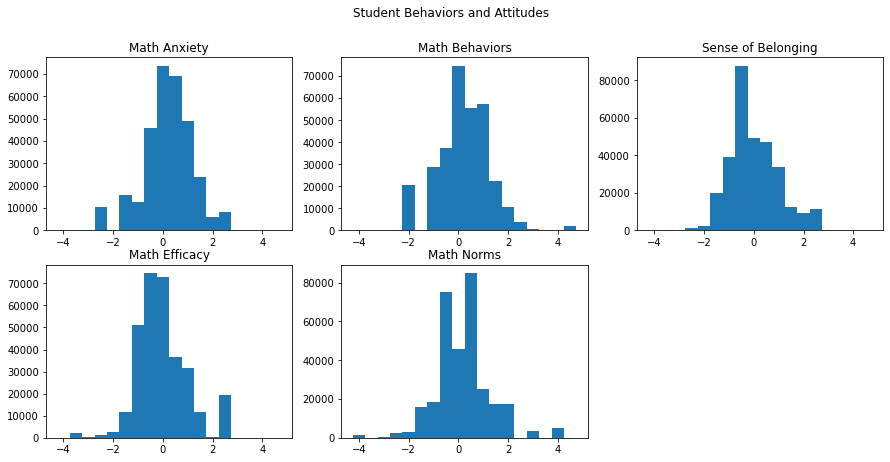

In [31]:
std_bins = np.arange(-4.25,4.8,0.5)
plt.figure(figsize = (15,7))
plt.subplot(231)
plt.hist(pisa_data.math_anxiety, bins = std_bins)
plt.title('Math Anxiety');
plt.subplot(232)
plt.hist(pisa_data.math_behaviors, bins = std_bins)
plt.title('Math Behaviors');
plt.subplot(234)
plt.hist(pisa_data.math_efficacy, bins = std_bins)
plt.title('Math Efficacy');
plt.subplot(235)
plt.hist(pisa_data.math_norm, bins = std_bins)
plt.title('Math Norms');
plt.subplot(233)
plt.hist(pisa_data.belong, bins = std_bins)
plt.title('Sense of Belonging');
plt.suptitle('Student Behaviors and Attitudes');

Most distributions are fairly symmetric, which we expect for a Normalized scores such as these. There are noticable extremes in some of these distributions that may be worth further investigation (math behaviors above 4, math efficacy/confidence under -3, math norms/socialization of -4 or 4).

### Teacher Factors
Investigate the distributions of teacher factors. What is the distribution for a teacher's use of formative assessment or support in mathematics?

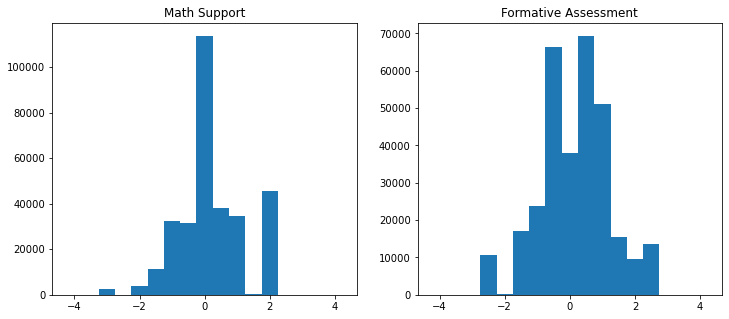

In [32]:
std_bins = np.arange(-4.25,4.5,0.5)
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.hist(pisa_data.teacher_math_sup, bins = std_bins)
plt.title('Math Support');
plt.subplot(122)
plt.hist(pisa_data.teacher_form, bins = std_bins)
plt.title('Formative Assessment');

Distributions are fairly symmetric, which we expect for a Normalized scores such as these. There is noticeable extreme in one distribution that may be worth further investigation (math support below -2).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* Preschool enrollment, language initiation, and family structure provide good sorting values to investigation early family decisions on the performance, behaviors, and attitudes of the student. There are also extreme values in some of the student behaviors, teacher behaviors, and social, economic, and cultural index of the families.

* No transformations were necessary to explore this data in a univariate manner. Many are Normally distributed, so it may require some conversion in bivariate or multivariate exploration.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* Parental occupation has a unique distribution. No clear pattern or discernable shape.

* Many variables were converted from strings to ordinal categorical variables to further aid additional analysis. This allows the categories to show up in their logical order, which improves the readability of the graphs and subsequent analysis.

## Bivariate Exploration

In this section, graphs will investigate relationships between pairs of variables in the data. This will focus on the intersection of social and personal variables to explore how the different perspectives relate with one another.

### Preschool Effect on Academic Performance
What is the effect of early childhood education (preschool) on student academic performance?

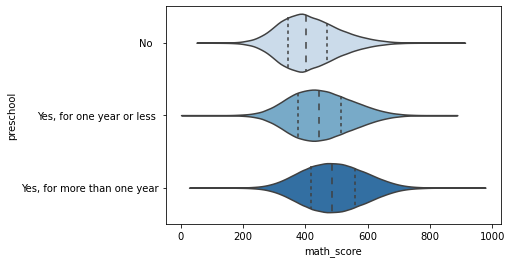

In [33]:
# graph the distribution of math performance according to preschool experience
sb.violinplot(data = pisa_data, y = 'preschool', x = 'math_score', inner='quartile', palette = 'Blues');

Preschool has a positive effect on test scores. Moving the median up 30-50 points per year of preschool experience.

### Language Learning and Language Scores
Does the age at which students learn their academic language have an association with the student reading score?

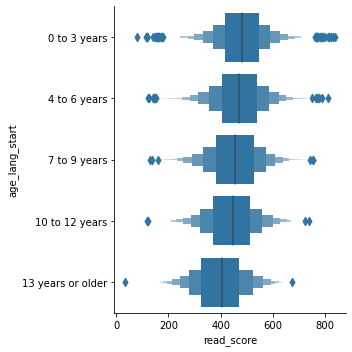

In [34]:
# graph the distribution of reading performance according to age at which the student started learning the language
sb.catplot(data = pisa_data, x = 'read_score', y = 'age_lang_start', kind='boxen', color = base_color);

The age at which a student begins to learn the language of assessment is related to the score on the language test. Earlier learning leads to higher scores.

### Gender Effect
Are there any noticeable differences in academic performance for the genders? Academic attitudes?

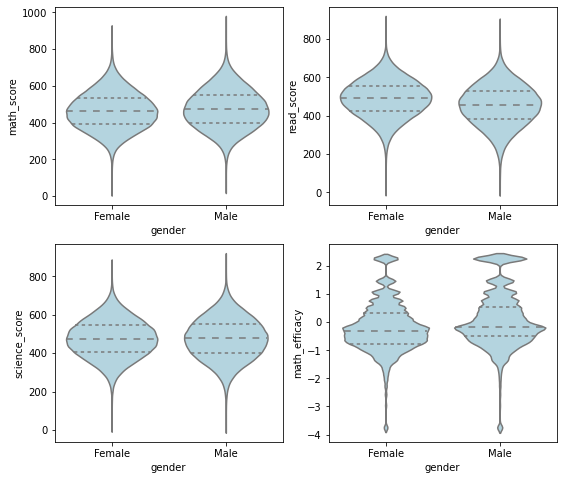

In [35]:
plt.figure(figsize = (9,8))
plt.subplot(221)
# graph the distribution of math performance according to gender
sb.violinplot(data = pisa_data, x = 'gender', y = 'math_score', color = 'lightblue', inner = 'quartile');
plt.subplot(222)
# graph the distribution of reading performance according to gender
sb.violinplot(data = pisa_data, x = 'gender', y = 'read_score', color = 'lightblue', inner = 'quartile');
plt.subplot(223)
# graph the distribution of science performance according to gender
sb.violinplot(data = pisa_data, x = 'gender', y = 'science_score', color = 'lightblue', inner = 'quartile');
plt.subplot(224)
# graph the distribution of math confidence according to gender
sb.violinplot(data = pisa_data, x = 'gender', y = 'math_efficacy', color = 'lightblue', inner = 'quartile');

Noted differences between gender on reading score.

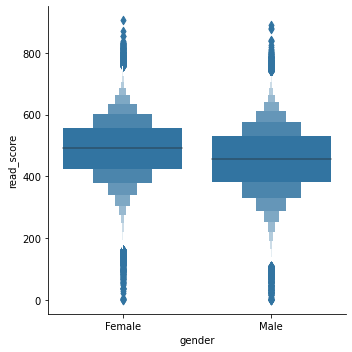

In [36]:
# graph the distribution of reading scores according to gender
sb.catplot(data = pisa_data, x = 'gender', y = 'read_score', kind = 'boxen', color = base_color);

Gender is associated with reading/language performance, female with higher performance.

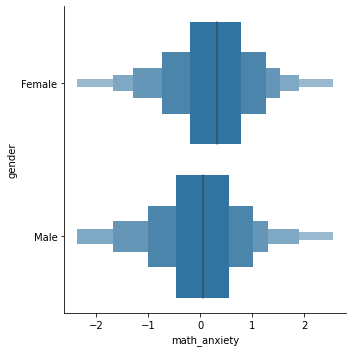

In [37]:
# graph the distribution of math anxiety across either gender
sb.catplot(data = pisa_data, x = 'math_anxiety', y = 'gender', kind= 'boxen', color = base_color);

Gender is related to rates of mathematical anxiety, female with higher rates.

### Immigration Generation vs. Academic Performance
Does the families immigration history influence student acacdemic performance?

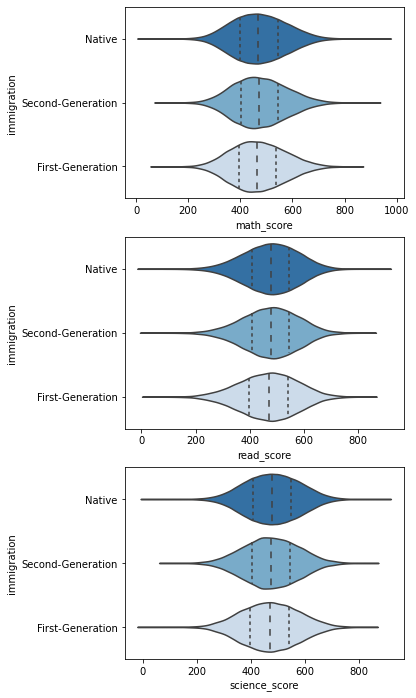

In [38]:
# graph the relationship between immigration generation across all three academic areas of performance
plt.figure(figsize=(5,12))
plt.subplot(311)
sb.violinplot(data = pisa_data, y = 'immigration', x = 'math_score', inner = 'quartile', palette = 'Blues_r');
plt.subplot(312)
sb.violinplot(data = pisa_data, y = 'immigration', x = 'read_score', inner = 'quartile', palette = 'Blues_r');
plt.subplot(313)
sb.violinplot(data = pisa_data, y = 'immigration', x = 'science_score', inner = 'quartile', palette = 'Blues_r');

No discernible difference in academic performance for immigration status.

### Immigration, Status, and Belonging
Does family immigration history affect family social status? Student sense of belonging?

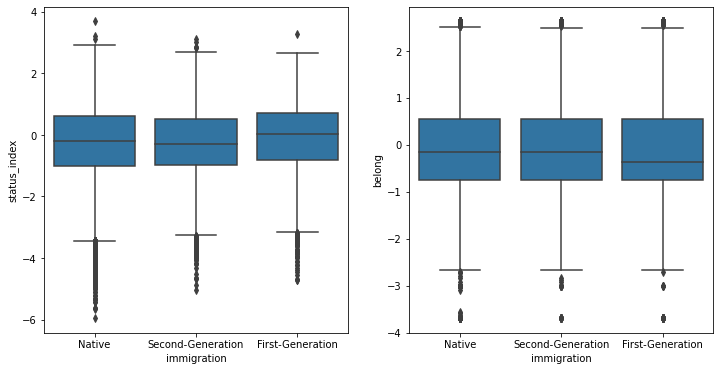

In [39]:
plt.figure(figsize = (12, 6))
plt.subplot(121)
# graph the distribution of family social status for different categories of immigration
sb.boxplot(data = pisa_data, x = 'immigration', y = 'status_index', color = base_color);
plt.subplot(122)
# graph the distribution of student sense of belonging for different categories of immigration
sb.boxplot(data = pisa_data, x = 'immigration', y = 'belong', color = base_color);

No considerable difference in social status or sense of belonging according to social status.

### Parental Occupation Status vs. Academic Performance
Is the level of parental employment related to an advantage for student academic performance?

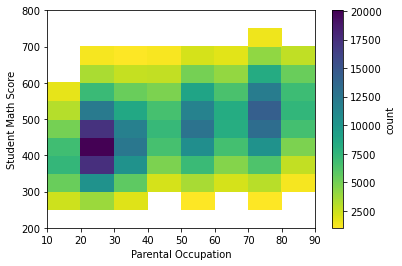

In [40]:
# establish bin boundaries for parent occupation scores
occ_bins = np.arange(10,95,10)
# establish bin boundaries for student academic scores
score_bins = np.arange(200,850,50)

# graph the density of points relating parental occupation to student academic performance
plt.hist2d(data = pisa_data, x = 'parent_occ', y = 'math_score', bins = [occ_bins, score_bins], cmin = 1000, cmap = 'viridis_r')
plt.colorbar(label = 'count')
plt.xlabel('Parental Occupation')
plt.ylabel('Student Math Score');

A noted positive correlation between parental occupation and academic achievement. Still a broad range of achievement at every level of parental occupation.

### Parental Education vs. Student Academics
How does the academic achievement of parents relate to the academic achievement of their children? How does parental education influence access to other factors related to academic success - access to home educational resources, parental occupation, family social status, and preschool enrollment?

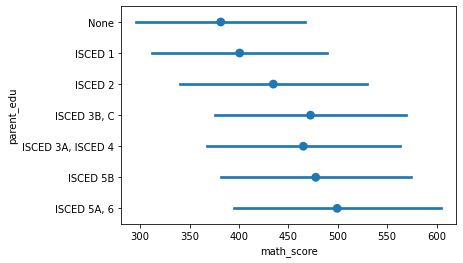

In [41]:
# graph the relationship between highest parental education and student math score
sb.pointplot(data = pisa_data, y = 'parent_edu', x = 'math_score', ci = 'sd', linestyles = "");

The level of parental education is strongly correlated to the level of student achievement.

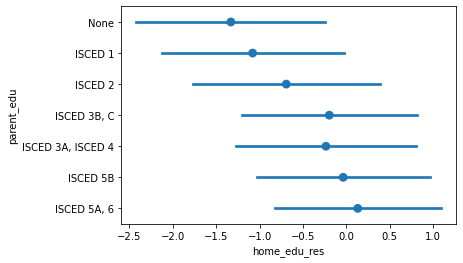

In [42]:
# graph the relationship between highest parental education and access to home educational resources
sb.pointplot(data = pisa_data, y = 'parent_edu', x = 'home_edu_res', ci = 'sd', linestyles = "");

Parental education is also related to the availability of educational resources at home.

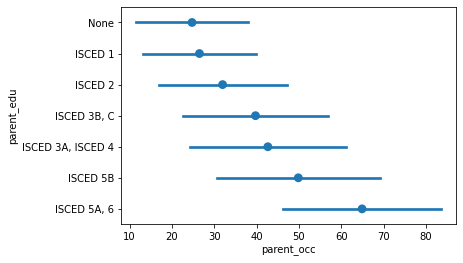

In [43]:
# graph the relationship between highest parental education and average parental occupation level
sb.pointplot(data = pisa_data, y = 'parent_edu', x = 'parent_occ', ci = 'sd', linestyles = "");

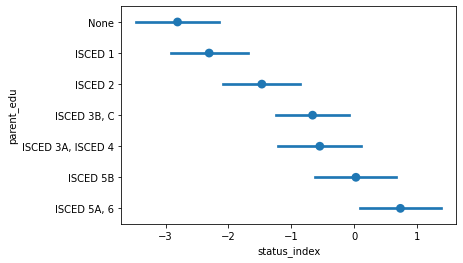

In [44]:
# graph the relationship between highest parental education and average social status
sb.pointplot(data = pisa_data, y = 'parent_edu', x = 'status_index', ci = 'sd', linestyles = "");

Parental education is also related with higher employment and social status for the family. 

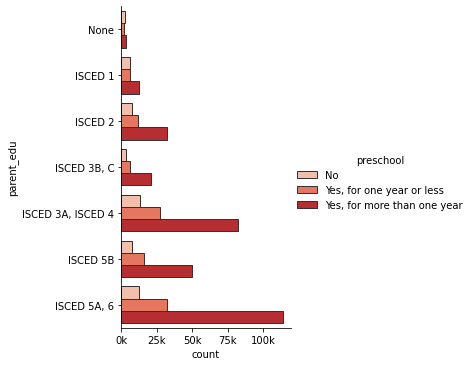

In [45]:
# graph the relationship between highest parental education and preschool enrollment
ax = sb.catplot(y="parent_edu", hue="preschool", kind="count",
            palette="Reds", edgecolor=".2",
            data=pisa_data)
ax.set_xticklabels(['0k','25k','50k','75k','100k']);

Rates of preschool attendance appear to be independent of parental education level.

### Family Structure and Status on Student Performance and Attitudes
Does family social status contribute to access to home educational resources? How are family social status and academic performance related? Does family social status affect student confidence in math?

Does the number of parents in the home affect academic performance? The ability of the family to attain higher social status?

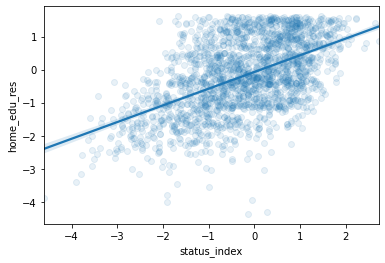

In [46]:
# graph the relationship between family social status and access to home educational resources
sb.regplot(data = pisa_data.sample(2000), x = 'status_index', y = 'home_edu_res', y_jitter = 0.5, scatter_kws = {'alpha':0.1});

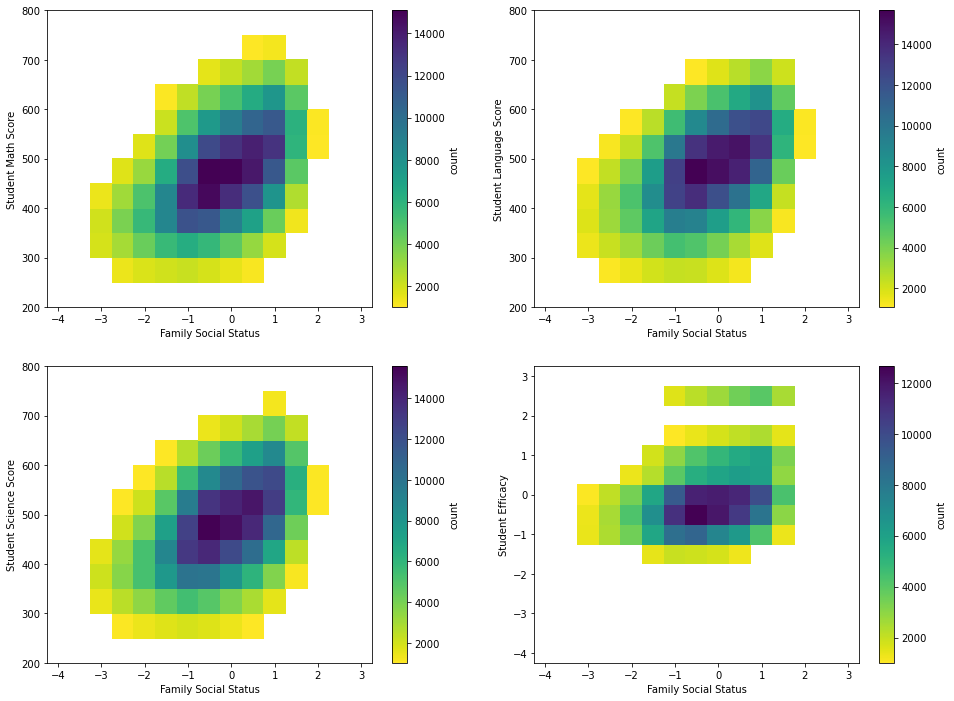

In [47]:
# establish bin structure for standardized score of social status and student confidence
std_bins = np.arange(-4.25,3.5,0.5)
# establish bin structure for academic scores
score_bins = np.arange(200,850,50)

plt.figure(figsize = (16, 12))
plt.subplot(221)
# plot density of family social status and math score
plt.hist2d(data = pisa_data, x = 'status_index', y = 'math_score', bins = [std_bins, score_bins], cmin = 1000, cmap = 'viridis_r')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student Math Score');
plt.subplot(222)
# plot density of family social status and reading score
plt.hist2d(data = pisa_data, x = 'status_index', y = 'read_score', bins = [std_bins, score_bins], cmin = 1000, cmap = 'viridis_r')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student Language Score');
plt.subplot(223)
# plot density of family social status and science score
plt.hist2d(data = pisa_data, x = 'status_index', y = 'science_score', bins = [std_bins, score_bins], cmin = 1000, cmap = 'viridis_r')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student Science Score');
plt.subplot(224)
# plot density of family social status and math confidence
plt.hist2d(data = pisa_data, x = 'status_index', y = 'math_efficacy', bins = [std_bins, std_bins], cmin = 1000, cmap = 'viridis_r')
plt.colorbar(label = 'count')
plt.xlabel('Family Social Status')
plt.ylabel('Student Efficacy');

Higher family social, cultural, and economic status is related to stronger academic performance. The higher status is related to significantly higher academic performance, but does not relate to much higher student math confidence.

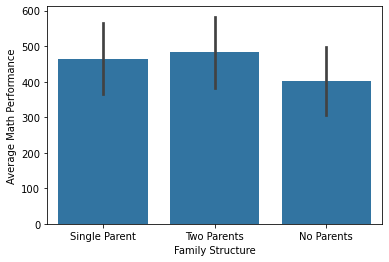

In [48]:
# plot the distribution of math scores according to family parental structure
ax = sb.barplot(data = pisa_data, x = 'fam_struct', y = 'math_score', ci = 'sd', color = base_color);
ax.set_xticklabels(['Single Parent', 'Two Parents', 'No Parents'])
plt.xlabel('Family Structure')
plt.ylabel('Average Math Performance');

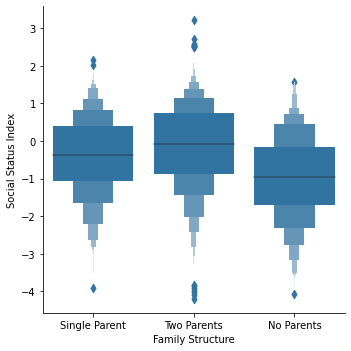

In [49]:
# plot the distribution of social status according to family parental structure
ax = sb.catplot(data = pisa_data.sample(10000), x = 'fam_struct', y = 'status_index', kind = 'boxen', color = base_color);
ax.set_xticklabels(['Single Parent', 'Two Parents', 'No Parents'])
plt.xlabel('Family Structure')
plt.ylabel('Social Status Index');

Most noticeable difference is between students without parents and those with parents. The students with one or two parents in the household with them perform better than students without parents with them. Social status index follows a similar pattern.

### Confluence of Mathematical Performance, Behaviors, Confidence, and Social Norms
What are the relations between a variety of mathematical academic indictators?

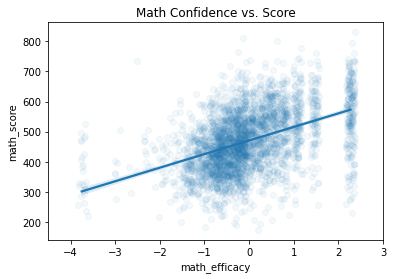

In [50]:
# plot the relationship between mathematical confidence and math score
sb.regplot(data = pisa_data.sample(5000), x = 'math_efficacy', y = 'math_score', x_jitter = 0.1, fit_reg=True, scatter_kws = {'alpha': 0.05});
plt.xlim(-4.5, 3);
plt.title('Math Confidence vs. Score');

A significant difference and trend between math confidence and math score. It appears that, on average, students know how good they are at the math tasks set before them.

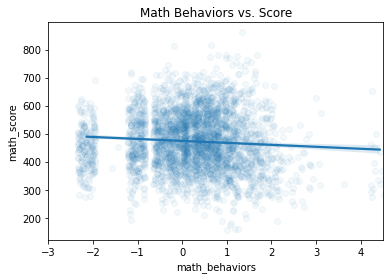

In [51]:
# plot the relationship between mathematical behaviors and math score
sb.regplot(data = pisa_data.sample(5000), x = 'math_behaviors', y = 'math_score', x_jitter = 0.2, fit_reg=True, scatter_kws = {'alpha': 0.05});
plt.xlim(-3, 4.5);
plt.title('Math Behaviors vs. Score');

Surprisingly, math performance seems to have little or nothing to do with mathematical behaviors, such as helping friends with math homework or participating in math-related extracurriculars.

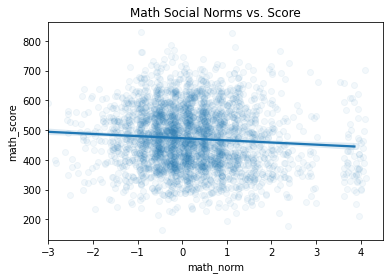

In [52]:
# plot the relationship between mathematical social norms (among family and friends) and math score
sb.regplot(data = pisa_data.sample(5000), x = 'math_norm', y = 'math_score', x_jitter = 0.25, fit_reg=True, scatter_kws = {'alpha': 0.05});
plt.xlim(-3, 4.5);
plt.title('Math Social Norms vs. Score');

Mathematical social norms (discussing and encouraging math performance by family and friends) also shows little effect on math performance. 

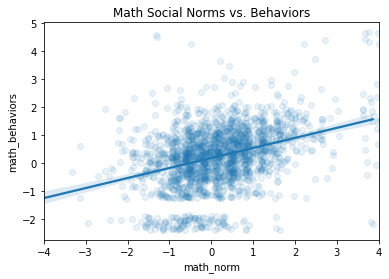

In [53]:
# plot the relationship between mathematical social norms (among family and friends) and engagement in mathematical behavior
sb.regplot(data = pisa_data.sample(3000), x = 'math_norm', y = 'math_behaviors', x_jitter = 0.25, y_jitter = 0.25, fit_reg=True, scatter_kws = {'alpha': 0.1});
plt.xlim(-4, 4);
plt.title('Math Social Norms vs. Behaviors');

Although neither social norms nor behavior influene mathematical performace in the previous analysis, it can be seen that with more math in the normal social circles (family and friends), average engagement in mathematical behaviors does increase.

### OECD Status and Performance
Does a country's partnership with the OECD goals contribute to academic performance?

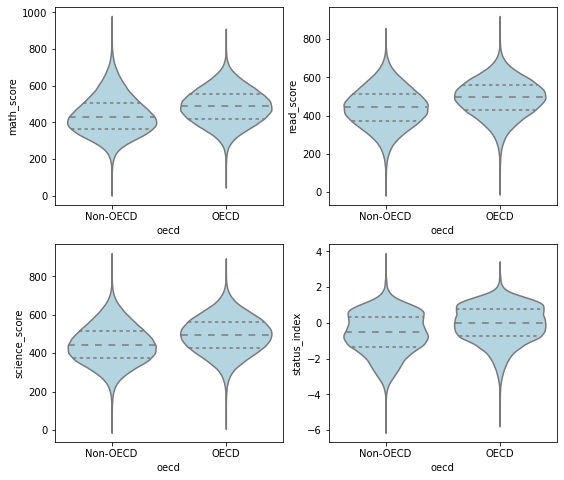

In [54]:
# explore the relationship between country OECD partnership and academic performance as well as family social status
plt.figure(figsize = (9,8))
plt.subplot(221)
sb.violinplot(data = pisa_data, x = 'oecd', y = 'math_score', color = 'lightblue', inner = 'quartile');
plt.subplot(222)
sb.violinplot(data = pisa_data, x = 'oecd', y = 'read_score', color = 'lightblue', inner = 'quartile');
plt.subplot(223)
sb.violinplot(data = pisa_data, x = 'oecd', y = 'science_score', color = 'lightblue', inner = 'quartile');
plt.subplot(224)
sb.violinplot(data = pisa_data, x = 'oecd', y = 'status_index', color = 'lightblue', inner = 'quartile');

OECD partnership status is related to an advantage in all academic performance areas as well as social, economic, and cultural status. The advantage is not large, but it is noticable and consistent across those areas.

### Teacher Behaviors by OECD Status
Does a country's partnership with the OECD goals contribute to the prevalence of teacher behaviors?

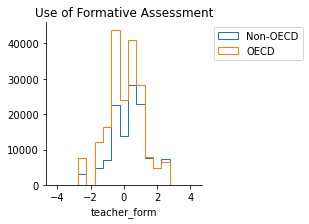

In [55]:
# explore the relationship between country OECD partnership and a teacher's use of formative assessment
std_bins = np.arange(-4.25,4.5,0.5)
g = sb.FacetGrid(data = pisa_data, hue = 'oecd');
g.map(plt.hist, 'teacher_form', bins = std_bins, histtype = 'step');
plt.title('Use of Formative Assessment');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

The distributions are have same shape, regardless of OECD status. Formative Assessment is used at similar rates in countries regardless of their OECD status.

### Teacher Behaviors vs. Student Performance
Is there any evidence that the strength of teacher behavior contributes to student academic performance?

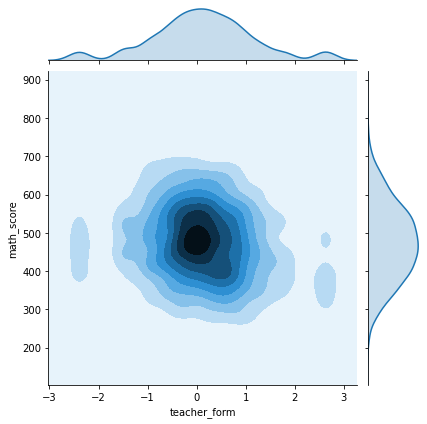

In [56]:
# explore the density of points in a teacher's use of formative assessment and student's math score
sb.jointplot(data = pisa_data.sample(5000), x = 'teacher_form', y = 'math_score', kind = 'kde');

The central concentration of this graph show no discernible connection between the teacher use of formative assessment and the student's math performance.

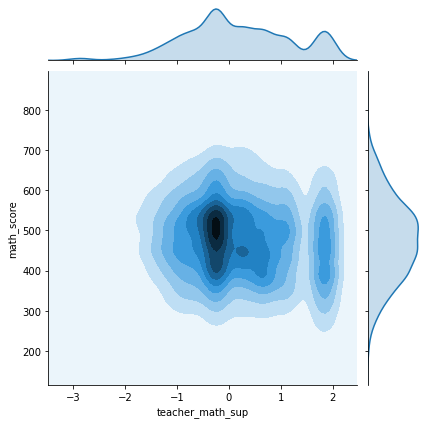

In [57]:
# explore the density of points in the relationship between math support from teacher and student math score
sb.jointplot(data = pisa_data.sample(5000), x = 'teacher_math_sup', y = 'math_score', kind = 'kde');

The graph shows that an increase in math support from the teacher is not related to any difference in the student's math score.

### Country Performance and Status
Are the connections between family social status and academic performance across all countries?

In [58]:
# gather the names of the 25 most represented countries in this study
top_countries = pisa_data.country.value_counts().iloc[:25].index
# gather the mean data for each of those 25 most represented countries to use in this subset of analysis
pisa_sub = pisa_data.groupby('country').mean()[pisa_data.groupby('country').mean().index.isin(top_countries)]

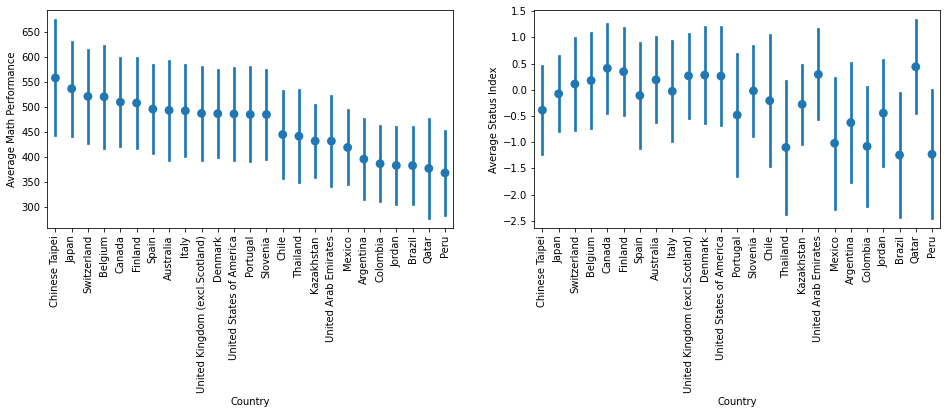

In [59]:
# order top 25 countries by their average student math score
math_order = pisa_sub.math_score.sort_values(ascending = False).index
plt.figure(figsize = (16,4))
# plot the countries in order of math score to show their average math score +/- a standard deviation
plt.subplot(121)
sb.pointplot(data = pisa_data, x = 'country', y = 'math_score', order = math_order, ci = 'sd', color = base_color, linestyles = "");
plt.xlabel('Country')
plt.ylabel('Average Math Performance')
plt.xticks(rotation = 90);
# plot the countries in order of math score to show their average social status +/- a standard deviation
plt.subplot(122)
sb.pointplot(data = pisa_data, x = 'country', y = 'status_index', order = math_order, ci = 'sd', color = base_color, linestyles = "");
plt.xlabel('Country')
plt.ylabel('Average Status Index')
plt.xticks(rotation = 90);

Looking at the 25 most represented countries, one graph shows the average math score in those countries. The other graph shows the average status index for those same countries. The status index graph highlights countries that perform above or below their status index. Qatar, UAE, and Chinese Taipei are examples of a country worth investigating.

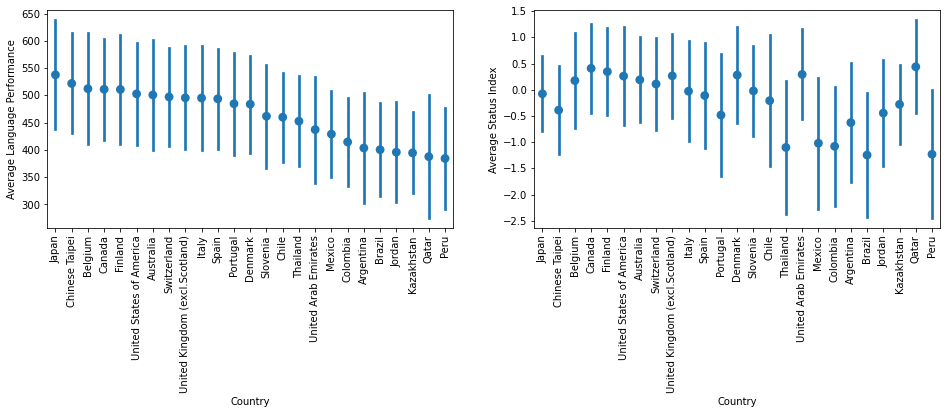

In [60]:
# order top 25 countries by their average student reading score
read_order = pisa_sub.read_score.sort_values(ascending = False).index
plt.figure(figsize = (16,4))
# plot the countries in order of reading score to show their average reading score +/- a standard deviation
plt.subplot(121)
sb.pointplot(data = pisa_data, x = 'country', y = 'read_score', order = read_order, ci = 'sd', color = base_color, linestyles = "");
plt.xlabel('Country')
plt.ylabel('Average Language Performance')
plt.xticks(rotation = 90);
# plot the countries in order of reading score to show their average social status +/- a standard deviation
plt.subplot(122)
sb.pointplot(data = pisa_data, x = 'country', y = 'status_index', order = read_order, ci = 'sd', color = base_color, linestyles = "");
plt.xlabel('Country')
plt.ylabel('Average Status Index')
plt.xticks(rotation = 90);

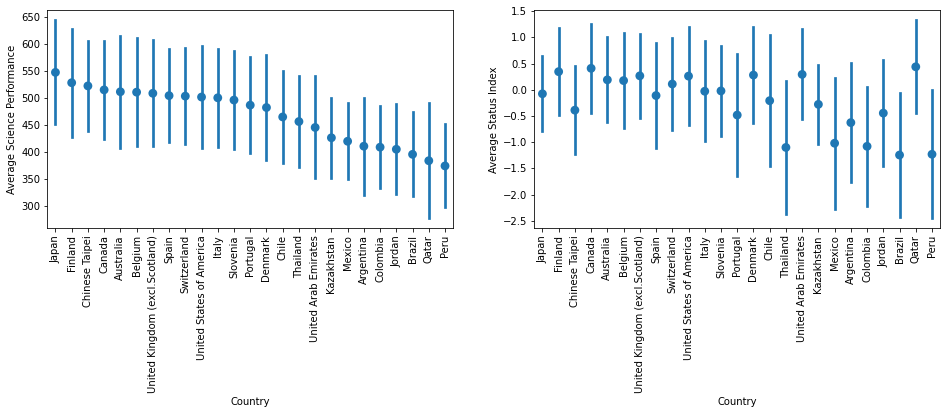

In [61]:
# order top 25 countries by their average student science score
science_order = pisa_sub.science_score.sort_values(ascending = False).index
plt.figure(figsize = (16,4))
# plot the countries in order of science score to show their average science score +/- a standard deviation
plt.subplot(121)
sb.pointplot(data = pisa_data, x = 'country', y = 'science_score', order = science_order, ci = 'sd', color = base_color, linestyles = "");
plt.xlabel('Country')
plt.ylabel('Average Science Performance')
plt.xticks(rotation = 90);
# plot the countries in order of science score to show their average social status +/- a standard deviation
plt.subplot(122)
sb.pointplot(data = pisa_data, x = 'country', y = 'status_index', order = science_order, ci = 'sd', color = base_color, linestyles = "");
plt.xlabel('Country')
plt.ylabel('Average Status Index')
plt.xticks(rotation = 90);

Chinese Taipei, UAE, and Qatar are still outliers from the trend with langauge and science scores.

### Instructional Time and Academic Performances
How strongly do instructional minutes contribute to student academic performance?

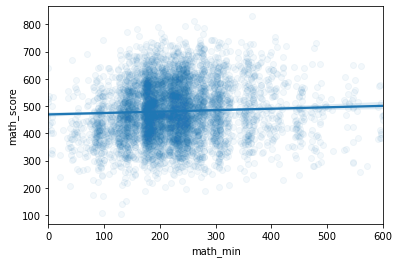

In [62]:
# explore relatonship between math instruction minutes and performance
sb.regplot(data = pisa_data.sample(10000), x = 'math_min', y = 'math_score', x_jitter = 10, scatter_kws = {'alpha': 0.05});
# set instructional minute range to the focus on the majority of students
plt.xlim(0,600);

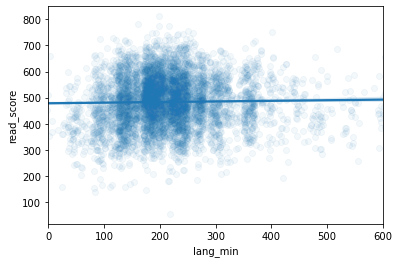

In [63]:
# explore relationship between language instructional minutes and reading performance
sb.regplot(data = pisa_data.sample(10000), x = 'lang_min', y = 'read_score', x_jitter = 10, scatter_kws = {'alpha': 0.05});
# set instructional minute range to the focus on the majority of students
plt.xlim(0,600);

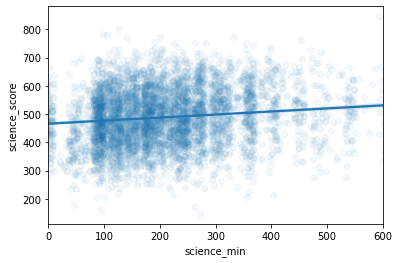

In [64]:
# explore relationship between science instructional minutes and performance
sb.regplot(data = pisa_data.sample(10000), x = 'science_min', y = 'science_score', x_jitter = 10, scatter_kws = {'alpha': 0.05});
# set instructional minute range to the focus on the majority of students
plt.xlim(0,600);

There is a wide range of academic performance, regardless of instructional minutes.  more instructional minutes is related to marginally higher average science scores, insignificantly higher average math scores, and no change in reading scores.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Preschool is related to higher academic performance
* Age of language learning is related to academic performance
* Parental occupation status is related to student academic performance
* Parental education attainment is related to academic performance, access to home educational resources, parental occupation level, and family status index
* Family status index is related to access to home educational resources
* Family status index is related to academic performance and student self-efficacy
* Family parental structure is related to status index and academic performance


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Gender is related to language score (but not math or science) and levels of math anxiety
* Math self-efficacy is related to math performance
* Math social environment is related to engagement in math behaviors
* Country's OECD classification is related to status index and student performance
* Student performance by country and average status index by country has a few exceptions that may be worth investigating

## Multivariate Exploration

In this section, relationships will be explored for further complexity or consistency depending on other variables.

### Early Education and Reading
Does the preschool advantage still hold if we control for when the students began learning the academic language?

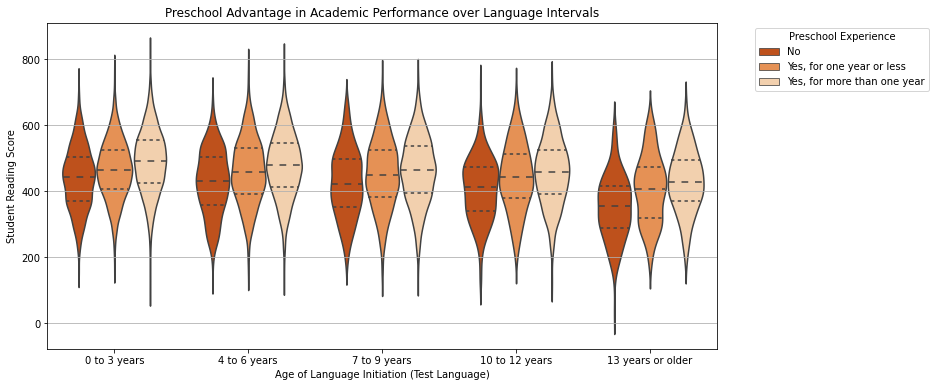

In [65]:
plt.figure(figsize=(12,6))

# analyze preschool experience, age of language initiation, and reading performance
plt.grid(True)
sb.violinplot(data = pisa_data, y = 'read_score', x = 'age_lang_start', hue = 'preschool', scale = 'area', inner = 'quartile', palette = 'Oranges_r');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title= "Preschool Experience");
plt.ylabel('Student Reading Score');
plt.xlabel('Age of Language Initiation (Test Language)');
plt.title('Preschool Advantage in Academic Performance over Language Intervals');

Preschool experience is related to a benefit in adolescent reading performance regardless of the age at which the student started learning the language. There appears to be a measurable benefit to sending students to preschool, even if they will migrate from that culture/language at a later date.

### Parent Education, Occupation, and Social Status
Do parental education and parental occupation level contribute significantly to social status as two different variables? Or are they simply a mask for one another?

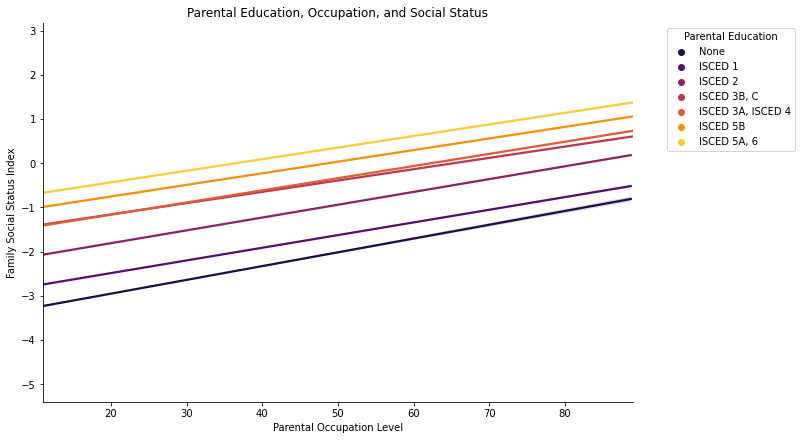

In [66]:
# plot the relationship for parental occupation and family social status across all levels of parental education
g = sb.FacetGrid(data = pisa_data, hue = 'parent_edu', palette = 'inferno', height = 6, aspect = 1.5);

# individual points will not be plotted to keep the graph simple and easy to read
g.map(sb.regplot, 'parent_occ', 'status_index', scatter_kws = {'alpha': 0});

# make the colors visible in the key so that the levels of parental education are clear
leg = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title = "Parental Education");
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.ylabel('Family Social Status Index');
plt.xlabel('Parental Occupation Level');
plt.title('Parental Education, Occupation, and Social Status');

Increased parental education is related to increased family social status and parental occupation level, but the relationship still holds for parental occupation and family social status, even when separated from the parental education level. At any education level, parents improve the social status of the family as they improve their job prospects.

### Parental Education, Family Social Status, and Performance
Does family social status still have a relationship with student academic performance if we separate each level of parental education? Or is parental education the primary driving force of the relationship with student academic performance?

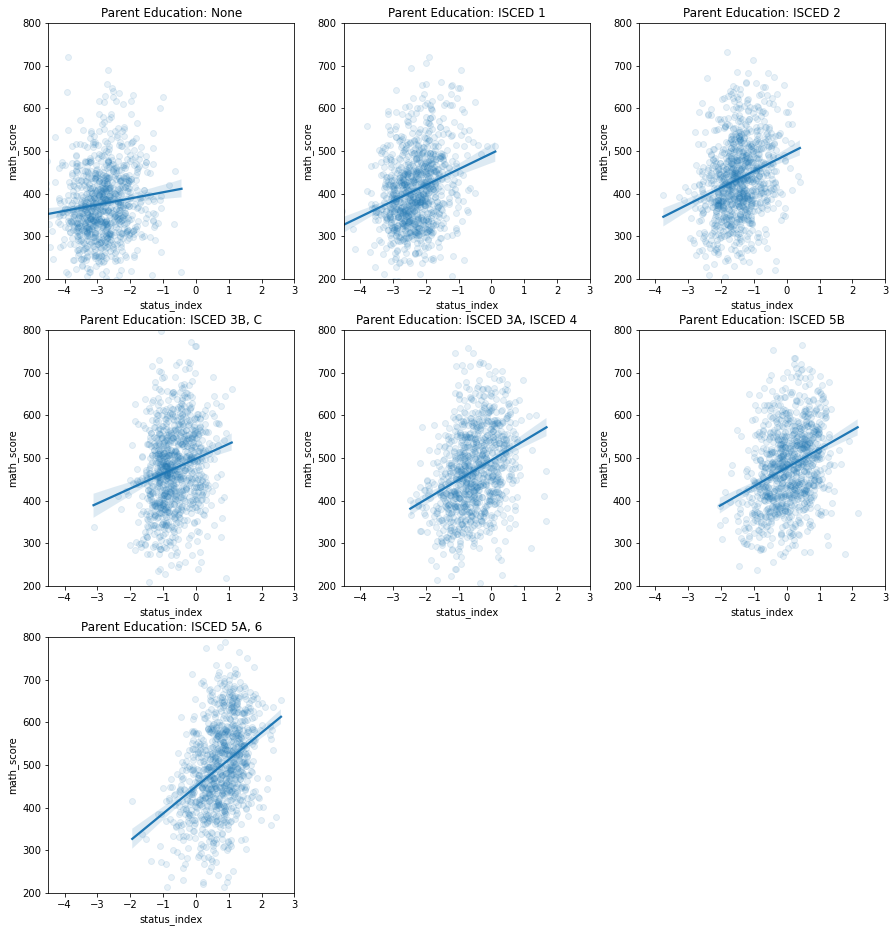

In [67]:
plt.figure(figsize = (15, 16));

# counter variable for proper subplot placement
i = 0;

# loop through each level of parental education from least to most
for _ in pisa_data.parent_edu.unique().sort_values():
    # if the level of parental education is given, then plot the graph
    if _ == _:
        plt.subplot(3,3,i+1)
        # label the graph with the appropriate level of education
        plt.title('Parent Education: {}'.format(_));
        # for consistent comparison, take a sample of 1000 from that level of parental education
        sub_data = pisa_data[pisa_data['parent_edu'] == _].sample(1000)
        sb.regplot(data = sub_data, x = 'status_index', y = 'math_score', scatter_kws = {'alpha':0.1});
        plt.xlim(-4.5,3);
        plt.ylim(200,800);
        i += 1;

When controlling for highest level of parental education, the relationship between family economic, social, and cultural status and the student academic performance is still positive and consistent. This means that even within spheres of similar parental education level, the families status is a positive predictor of student academic performance. Limitation: there is still a broad spread of academic scores at similar educational levels.

### Family Parental Structure, Status Index, and Academic Performance
How does the family parental structure effect the relationship between family social status and student academic performance?

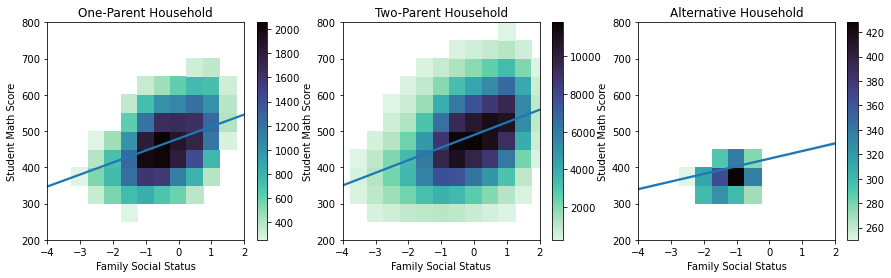

In [68]:
# descriptive titles for the different family structures in the survey
households = ['One-Parent', 'Two-Parent', 'Alternative']
plt.figure(figsize = (15, 4));

# counter variable for proper subplot placement
i = 0;

# loop through the three different family structures
for _ in pisa_data.fam_struct.value_counts().index.sort_values():
    plt.subplot(1,3,i+1)
    plt.grid(True)
    # title each graph appropriately
    plt.title('{} Household'.format(households[int(_)-1]));
    # collect the appropriate data for the current family structure
    sub_data = pisa_data[pisa_data['fam_struct'] == _]
    # plot a 2-dimension histogram (heatmap) of family social status and math score
    plt.hist2d(data = sub_data, x = 'status_index', y = 'math_score', bins = [std_bins, score_bins], cmin = 250, cmap = 'mako_r');
    # plot a least-squares regression line to further illustrate the relationship
    sb.regplot(data = sub_data, x = 'status_index', y = 'math_score', scatter_kws = {'alpha':0})
    plt.xlim(-4,2);
    plt.ylim(200,800);
    plt.xlabel('Family Social Status');
    plt.ylabel('Student Math Score');
    plt.colorbar();
    i += 1;

The heatmaps and least-squares regression lines in the plots clearly illustrate the effect of having a parent in the home. Having a parent in the home protects the relationship between family social status and academic performance. Not only do families without a parent in the home not achieve the same spread in social status, their social improvements are likely to only yield half of the gains in academic performance.

### Correlation between Quantitative Variables
In the general analysis of quantitative variables, which relationships are strongest? Which are weakest? Which are worth further exploration?

In [69]:
# calculate an academic average for each student
pisa_data['academic_avg'] = (pisa_data.math_score + pisa_data.read_score + pisa_data.science_score)/3

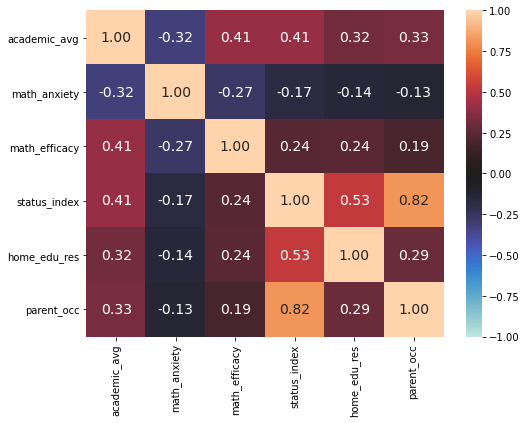

In [70]:
# identify quantitative variables of interest for this correlation map
pisa_stats = ['academic_avg','math_anxiety', 'math_efficacy','status_index', 'home_edu_res', 'parent_occ']
plt.figure(figsize = (8,6))

# graph the correlation map to quantify the strength of relationship between each quantitative variable of interest
sb.heatmap(pisa_data[pisa_stats].corr(), cmap='icefire', annot=True, fmt='.2f', vmin = -1, annot_kws={"fontsize":14});

The next most significant relationships to academic performance are math confidence, family social status, parental occupation, and educational resources at home. The correlation map also shows why the quantitative variables must be separated into categorical groups for meaningful analysis, with a majority of the data showing insignificant to no correlation.

### Country Status-Performance Exceptions

Some countries perform significantly above their average social status, while others perform significantly below their average social status. In this investigation, a data subset is created for the country data. A performance index is calculated for comparison purposes. The performance index is calculated as (1 + AP)/(1 + SP), where AP is the academic percentile (percentile of the average academic performance in that country) and SP is the status percentile (percentile of the average social status in that country). For example, a country in the 1st percentile of status that performs academically in the 99th percentile of academics would have a performance index near 2. On the other hand, a country in the 99th percentile of status that performs academically in the 1st percentile will have a performance index near 0.5.

In [71]:
# produce a subset of the dataframe that organizes the average information by country
pisa_country_data = pisa_data.groupby('country').mean()

In [72]:
# investigate which variables are present in the country data (quantitative variables)
pisa_country_data.columns

Index(['student_id', 'age_edu_start', 'culture_dist', 'parent_occ',
       'father_occ_status', 'mother_occ_status', 'status_index', 'fam_struct',
       'home_edu_res', 'math_score', 'read_score', 'science_score',
       'math_anxiety', 'math_behaviors', 'math_efficacy', 'math_work_ethic',
       'math_norm', 'belong', 'lang_min', 'math_min', 'science_min',
       'teacher_math_sup', 'teacher_form', 'academic_avg'],
      dtype='object')

In [73]:
# calculate performance index as described above
pisa_country_data['performance'] = (1+pisa_country_data.academic_avg.rank(pct = True)) / (1+pisa_country_data.status_index.rank(pct = True))

In [74]:
# investigate dimensions of the country data set
pisa_country_data.shape

(66, 25)

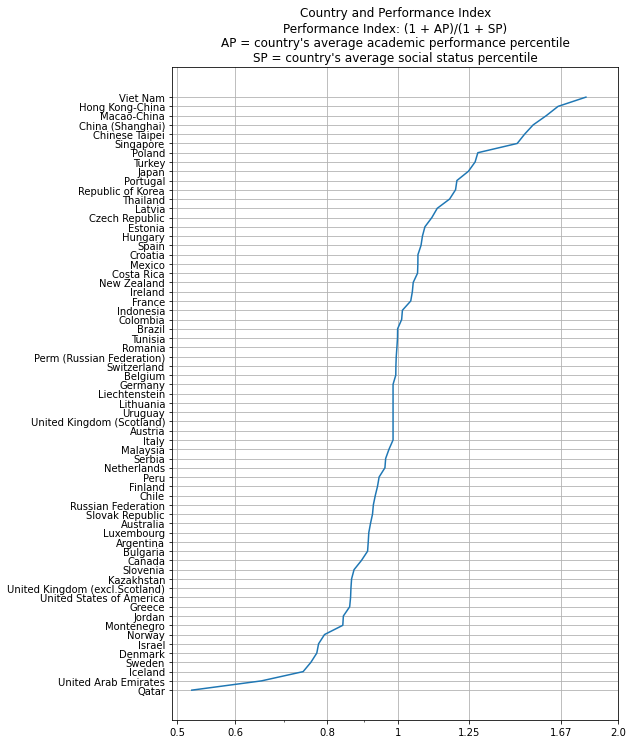

In [87]:
# gather the countries and their respective performance indices
countries = pisa_country_data.performance.sort_values().dropna().index
perform = pisa_country_data.performance.sort_values().dropna().values
plt.figure(figsize = (8, 12));
plt.grid(True)

# plot each country and its performance index to show the distribution across all countries
plt.plot(perform, countries);
plt.title('Country and Performance Index\nPerformance Index: (1 + AP)/(1 + SP)\nAP = country\'s average academic performance percentile\nSP = country\'s average social status percentile')
plt.xscale('log');
plt.xticks([]);
ax = plt.gca();
ax.axes.xaxis.set_ticks([.5, .6, 0.8, 1, 1.25, 1.67, 2.0]);
ax.axes.set_xticklabels([.5, .6, 0.8, 1, 1.25, 1.67, 2.0]);

In [76]:
# print the minimum and maximum performance indices to better understand the range
print('Minimum Performance Index: {0:.2f}\nMaximum Performance Index: {1:.2f}'.format(pisa_country_data.performance.min(), pisa_country_data.performance.max()))

Minimum Performance Index: 0.52
Maximum Performance Index: 1.81


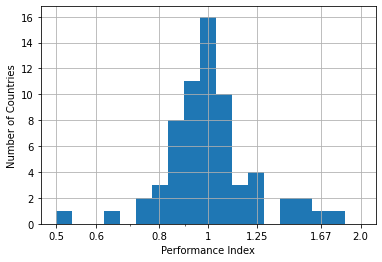

In [77]:
# plot a histogram of the distribution of performance indices for better analysis of the outliers
logbins = np.logspace(np.log10(0.5),np.log10(2),20)
plt.grid(True)
plt.hist(pisa_country_data.performance, bins = logbins);
plt.xscale('log');
plt.xticks([.5, .6, 0.8, 1, 1.25, 1.67, 2.0], [.5, .6, 0.8, 1, 1.25, 1.67, 2.0])
plt.xlabel('Performance Index');
plt.ylabel('Number of Countries');

In [78]:
# gather the list of the top 10 countries according to performance index
upper_countries = pisa_country_data.performance.sort_values(ascending = False).dropna().head(10).index

In [79]:
# gather the list of the bottom 10 countries according to performance index
lower_countries = pisa_country_data.performance.sort_values(ascending = True).dropna().head(10).index

In [80]:
# display the countries in each of the top 10 or bottom 10 of performance data
print("Countries with a high performance index: {}".format(', '.join(upper_countries.tolist())))
print("Countries with a low performance index: {}".format(', '.join(lower_countries.tolist())))

Countries with a high performance index: Viet Nam, Hong Kong-China, Macao-China, China (Shanghai), Chinese Taipei, Singapore, Poland, Turkey, Japan, Portugal
Countries with a low performance index: Qatar, United Arab Emirates, Iceland, Sweden, Denmark, Israel, Norway, Montenegro, Jordan, Greece


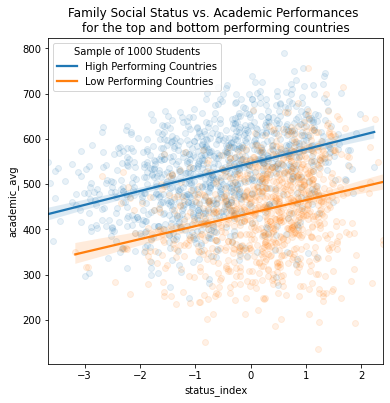

In [81]:
plt.figure(figsize = (6, 6))
# sample 1000 students from high performing countries, plot a linear regression of family social status and academic performance
sb.regplot(data = pisa_data[pisa_data['country'].isin(upper_countries)].sample(1000), x = 'status_index', y = 'academic_avg', scatter_kws = {'alpha':0.1});
# sample 1000 students from low performing countries, plot a linear regression of family social status and academic performance
sb.regplot(data = pisa_data[pisa_data['country'].isin(lower_countries)].sample(1000), x = 'status_index', y = 'academic_avg', scatter_kws = {'alpha':0.1});
plt.legend(['High Performing Countries','Low Performing Countries'], title = 'Sample of 1000 Students');
plt.title('Family Social Status vs. Academic Performances \nfor the top and bottom performing countries');

Interestingly, the correlation for the samples of the upper and lower performing countries seem to be of similar strength and direction. In the graph, it appears that the higher performing countries have an advantage of 100-150 points over the lower performing countries.

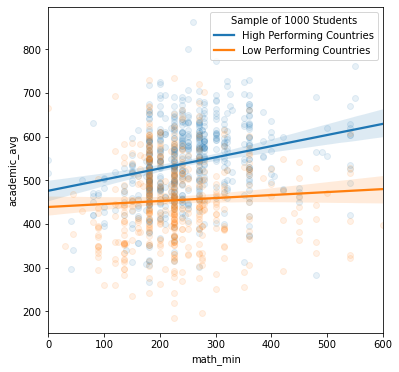

In [82]:
plt.figure(figsize = (6, 6))
# sample 1000 students from high performing countries, plot a linear regression of instructional minutes and academic performance
sb.regplot(data = pisa_data[pisa_data['country'].isin(upper_countries)].sample(1000), x = 'math_min', y = 'academic_avg', scatter_kws = {'alpha':0.1});
# sample 1000 students from low performing countries, plot a linear regression of instructional minutes and academic performance
sb.regplot(data = pisa_data[pisa_data['country'].isin(lower_countries)].sample(1000), x = 'math_min', y = 'academic_avg', scatter_kws = {'alpha':0.1});
plt.legend(['High Performing Countries','Low Performing Countries'], title = 'Sample of 1000 Students');
plt.xlim(0, 600);

Although a wide range of instructional minutes and academic performance are observed, there are two distinct relationships seen in the samples depending on a country's performance status. From the graph above, it seems that there is something in the upper performaing countries' school structure that makes considerably more use of the available instructional minutes.

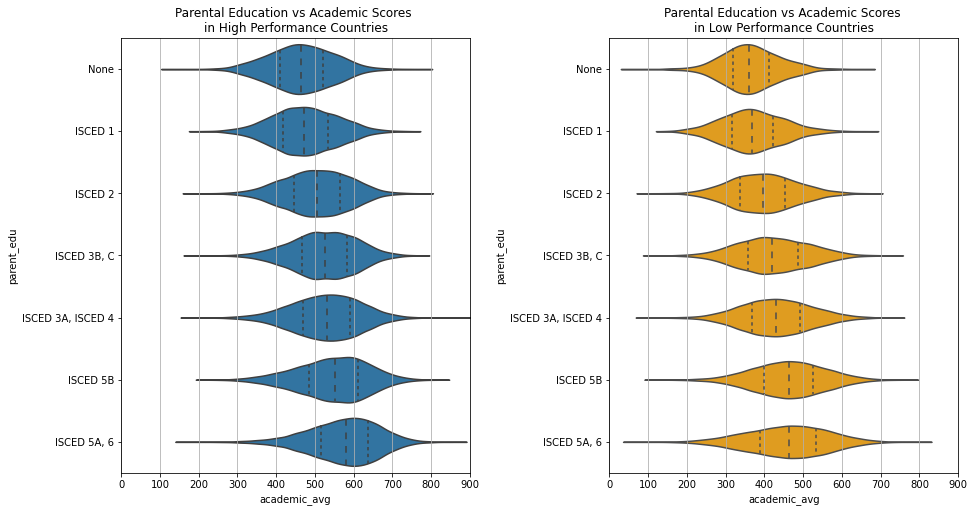

In [83]:
plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
plt.grid(True)
# plot the distributions of academic scores and parental education for high performing countries
sb.violinplot(data = pisa_data[pisa_data.country.isin(upper_countries)], x = 'academic_avg', y = 'parent_edu', inner='quartile', color = base_color);
plt.title('Parental Education vs Academic Scores \nin High Performance Countries');
plt.xlim(0,900);
plt.subplot(1, 2, 2)
plt.grid(True)
# plot the distributions of academic scores and parental education for low performing countries
sb.violinplot(data = pisa_data[pisa_data.country.isin(lower_countries)], x = 'academic_avg', y = 'parent_edu', inner='quartile', color = 'orange');
plt.title('Parental Education vs Academic Scores \nin Low Performance Countries');
plt.xlim(0,900);
plt.subplots_adjust(wspace = 0.4);

The trends observed above are consistent across all levels of parental education. This speaks to the fact that there are factors beyond the scope of this analysis that are contributing to these complex relationships. For example, there could be a disparity between the quality of parental education in these countries, seeing as no formal parental education in the high performing countries has similar student results as a parental college degree in the low performing countries. 

### OECD Partnership, Status Index, and Performance
Is the relationship between family social status and student academic performance any different between OECD countries and non-OECD countries?

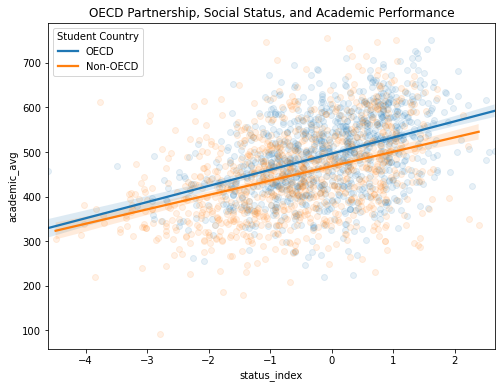

In [84]:
plt.figure(figsize = (8, 6))
# sample 1000 students from OECD countries, plot a linear regression of family social status and academic performance
sb.regplot(data = pisa_data[pisa_data.oecd == 'OECD'].sample(1000), x = 'status_index', y = 'academic_avg', scatter_kws = {'alpha': 0.1});
# sample 1000 students from non-OECD countries, plot a linear regression of family social status and academic performance
sb.regplot(data = pisa_data[pisa_data.oecd == 'Non-OECD'].sample(1000), x = 'status_index', y = 'academic_avg', scatter_kws = {'alpha': 0.1});
plt.legend(['OECD','Non-OECD'], title = 'Student Country');
plt.title('OECD Partnership, Social Status, and Academic Performance');

The graph above shows that the academic advantage for OECD countries increases slightly as the family gains more social status in those countries. The differences in academic performance for students of low social status is negligible between OECD and Non-OECD countries, while the differences in academic performance become more significant as the students' families gain more social status.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In the multivariate analysis, the investigations continue to explore the previous bivariate relationships from additional perspectives. These additional perspectives provide insight into whether or not the previously observed behavior is consistent regardless of the additional variable or if it is somehow dependent upon the additional variable.

The following relationshiops were observed:
* Preschool experience is related to an academic advantage, regardless of when the student began learning the test language
* At any education level, parents improve the social status of the family as they improve their job prospects
* When controlling for parental education level, family social status is a positive predictor of student academic performance
* Having a parent in the home protects the relationship between family social status and academic performance
* The academic advantage for OECD countries increases slightly over non-OECD countries as the family gains more social status in those countries

### Were there any interesting or surprising interactions between features?

* Despite the strong relationship between family social status and student academic performance, there are countries that perform above their average social status to achieve higher academic scores and there are countries that perform below their average social status and achieve lower academic scores. These discrepancies are consistent across parental education level and family social status in these respective groups.
* When comparing countries on the two extremes of performance as described above, there is a significant difference in the relationship between academic instructional minutes (in math) and student academic performance. The group of highest performing countries have a strong positive relationship between instruction minutes and academic performance, while the group of lowest performing countries have a nearly zero relationship.